<a href="https://colab.research.google.com/github/JonathanKBP/Analise-de-jogadores-da-fifa-Data-Science/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar bibliotecas e dados**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dados = pd.read_csv('sds.fifa_atualizado.csv')

In [25]:
dados.head()

,Unnamed: 0,Nome,Idade,Posicao,Media,Potencial,Time,Salario,Total_Pontos
0,0,V. Thill,20,RW,63,77,CD Nacional,2000,1551
1,1,S. Wamangituka,20,RM,72,83,VfB Stuttgart,13000,1847
2,2,14 A. Wolf,31,CB,73,73,AS Monaco,30000,1621
3,3,N. De la Cruz,23,CM,78,85,River Plate,17000,2180
4,4,Isco,28,CAM,83,83,Real Madrid,190000,2077


In [26]:
dados.drop('Unnamed: 0', axis=1, inplace=True)

In [27]:
dados.head()

,Nome,Idade,Posicao,Media,Potencial,Time,Salario,Total_Pontos
0,V. Thill,20,RW,63,77,CD Nacional,2000,1551
1,S. Wamangituka,20,RM,72,83,VfB Stuttgart,13000,1847
2,14 A. Wolf,31,CB,73,73,AS Monaco,30000,1621
3,N. De la Cruz,23,CM,78,85,River Plate,17000,2180
4,Isco,28,CAM,83,83,Real Madrid,190000,2077


# **Pré-Processamento dos dados**

In [28]:
dados.columns

Index(['Nome', 'Idade', 'Posicao', 'Media', 'Potencial', 'Time', 'Salario',
       'Total_Pontos'],
      dtype='object')

In [29]:
colunas = ['Nome', 'Time']

In [30]:
dados.drop(colunas, axis=1, inplace=True)

In [31]:
dados.head()

,Idade,Posicao,Media,Potencial,Salario,Total_Pontos
0,20,RW,63,77,2000,1551
1,20,RM,72,83,13000,1847
2,31,CB,73,73,30000,1621
3,23,CM,78,85,17000,2180
4,28,CAM,83,83,190000,2077


In [32]:
dados = dados[['Idade', 'Posicao', 'Media', 'Potencial', 'Total_Pontos', 'Salario']]

In [33]:
dados.head()

,Idade,Posicao,Media,Potencial,Total_Pontos,Salario
0,20,RW,63,77,1551,2000
1,20,RM,72,83,1847,13000
2,31,CB,73,73,1621,30000
3,23,CM,78,85,2180,17000
4,28,CAM,83,83,2077,190000


In [38]:
X = dados.iloc[:, :-1].values

In [39]:
print(X)

[[20 'RW' 63 77 1551]
 [20 'RM' 72 83 1847]
 [31 'CB' 73 73 1621]
 [23 'CM' 78 85 2180]
 [28 'CAM' 83 83 2077]
 [23 'LM' 75 83 1940]
 [17 'CM' 65 85 1656]
 [24 'LW' 83 86 2014]
 [17 'ST' 64 84 1510]
 [22 'CDM' 75 82 2035]
 [18 'CM' 75 89 2016]
 [16 'RW' 69 88 1623]
 [26 'RB' 73 76 1969]
 [29 'LW' 87 87 2096]
 [17 'CAM' 66 87 1629]
 [19 'RW' 75 86 1816]
 [18 'RM' 77 88 1968]
 [22 'CB' 76 87 1663]
 [25 'CB' 77 81 1733]
 [19 'ST' 86 92 2052]
 [34 'ST' 79 79 2041]
 [17 'LM' 76 90 1865]
 [17 'CM' 78 89 2086]
 [17 'CAM' 68 85 1561]
 [20 'CB' 74 84 1734]
 [18 'CB' 71 87 1817]
 [18 'RM' 72 87 1792]
 [21 'CB' 81 90 1841]
 [27 'CAM' 77 77 2064]
 [17 'CM' 74 88 1962]
 [21 'CB' 71 81 1591]
 [17 'LW' 76 90 1817]
 [33 'RW' 93 93 2231]
 [17 'CAM' 75 88 1858]
 [19 'CAM' 77 87 1967]
 [18 'ST' 69 86 1750]
 [18 'RM' 77 89 1922]
 [18 'GK' 68 86 911]
 [21 'CAM' 80 87 1993]
 [17 'ST' 74 87 1881]
 [20 'CB' 75 85 1714]
 [19 'RB' 75 88 1964]
 [17 'CAM' 75 88 1876]
 [19 'CAM' 74 88 2001]
 [21 'ST' 76 83 1832]
 

In [40]:
Y = dados.iloc[:, -1].values

In [41]:
print(Y)

[  2000  13000  30000  17000 190000  30000   2000  82000   5000  20000
   6000   6000  10000 290000   1000  44000  25000  40000  14000  67000
  48000  14000   6000   3000  16000    500   5000  41000  95000   6000
  45000  24000 560000   6000  27000   6000  33000    550  40000    500
  17000  50000   7000   9000  22000  70000  11000 220000  11000  17000
  20000  19000  16000   7000    500  46000 110000  95000   7000  10000
  10000 135000    500 170000 160000 270000  40000  77000 150000 270000
  58000  76000   2000 240000  25000  95000  30000 270000 210000  78000
   3000   4000  53000  13000 210000  29000  23000  61000  33000  23000
   1000  29000  95000   9000  38000  59000  66000  44000  90000  30000
  46000  83000  31000  36000 125000  25000  23000  90000  71000 150000
    500  95000  13000  13000   1000   7000   2000   7000   8000  40000]


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X).toarray()

In [43]:
print(X)

[[0.000e+00 0.000e+00 0.000e+00 ... 6.300e+01 7.700e+01 1.551e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 7.200e+01 8.300e+01 1.847e+03]
 [0.000e+00 1.000e+00 0.000e+00 ... 7.300e+01 7.300e+01 1.621e+03]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 7.500e+01 8.500e+01 1.812e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 7.400e+01 8.300e+01 1.788e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 7.500e+01 8.300e+01 1.904e+03]]


# **Criar Machine Learning**

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [46]:
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[ 53426.8   11000.  ]
 [ 49162.31  38000.  ]
 [ 49865.19  59000.  ]
 [-37806.85   5000.  ]
 [ 46636.54  44000.  ]
 [ 34850.66   6000.  ]
 [125920.17  82000.  ]
 [ 46641.22   6000.  ]
 [ 82355.01  70000.  ]
 [ 71095.84  23000.  ]
 [ 36290.23   6000.  ]
 [  4394.48  20000.  ]
 [ 26546.14  30000.  ]
 [-22520.55  10000.  ]
 [-32709.77  40000.  ]
 [ 27228.05  25000.  ]
 [-23271.59  45000.  ]
 [ 55125.18   9000.  ]
 [ 67648.71  95000.  ]
 [ -5068.88  30000.  ]
 [128561.59 170000.  ]
 [ 48563.09  10000.  ]
 [ 32798.38  25000.  ]
 [ -4826.21  16000.  ]]


In [50]:
regressor.score(X_test, Y_test)

0.06656096721171612

In [51]:
importancia = regressor.coef_

Feature: 0, Score: 26013.86770


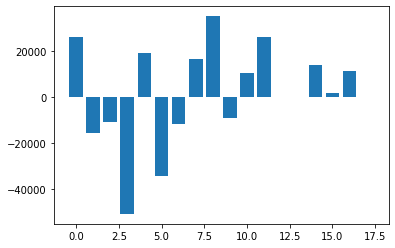

Feature: 1, Score: -15610.57900


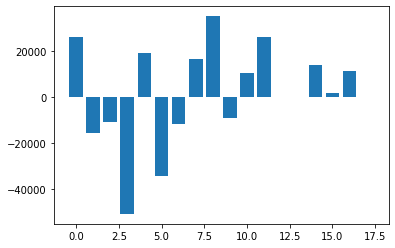

Feature: 2, Score: -11072.64009


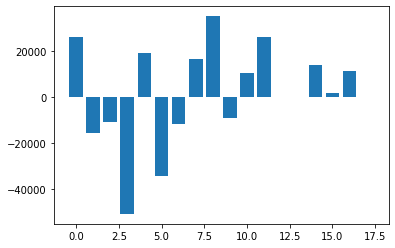

Feature: 3, Score: -50848.22851


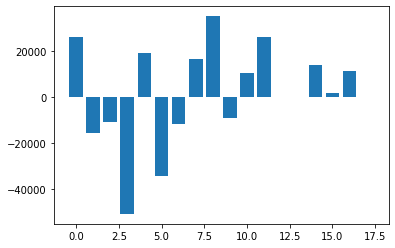

Feature: 4, Score: 18982.83191


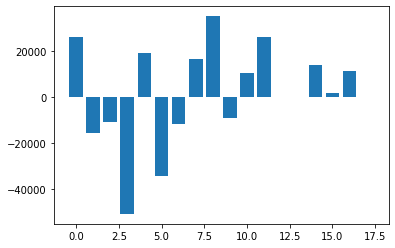

Feature: 5, Score: -34295.95454


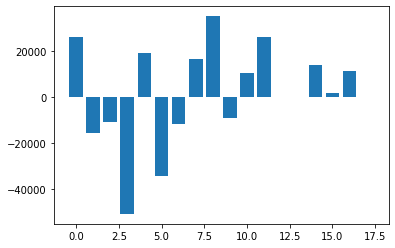

Feature: 6, Score: -12024.49137


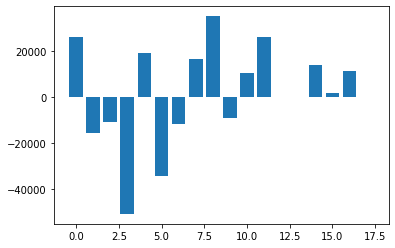

Feature: 7, Score: 16550.29554


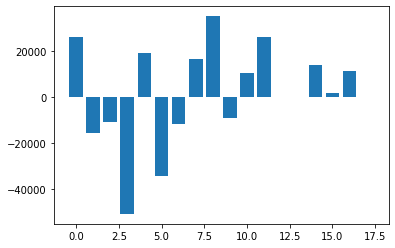

Feature: 8, Score: 34963.90931


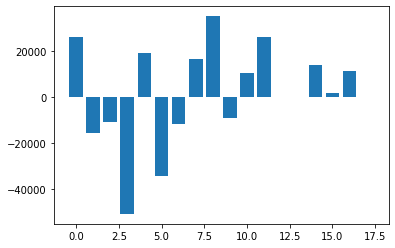

Feature: 9, Score: -8994.11034


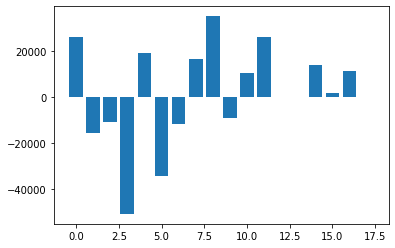

Feature: 10, Score: 10491.43109


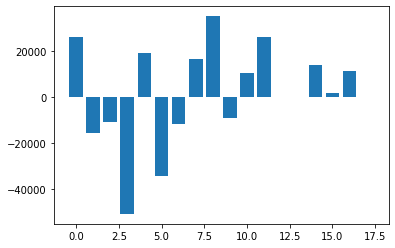

Feature: 11, Score: 26048.68925


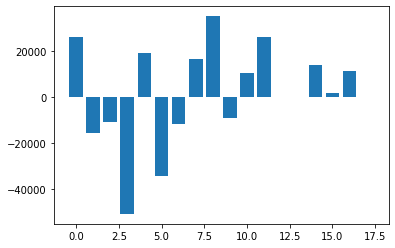

Feature: 12, Score: -0.00000


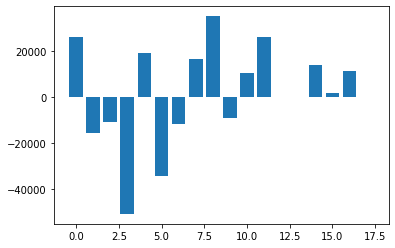

Feature: 13, Score: -205.02095


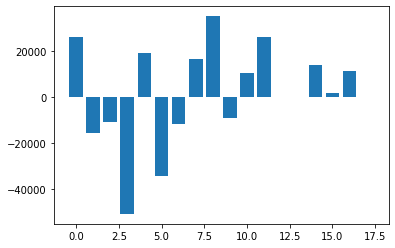

Feature: 14, Score: 13774.14351


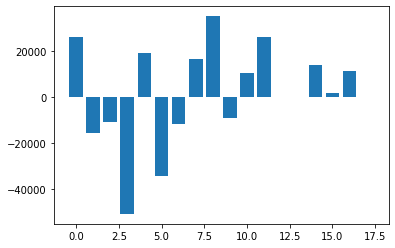

Feature: 15, Score: 1790.75406


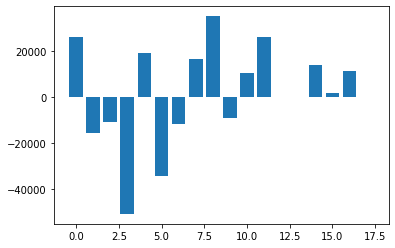

Feature: 16, Score: 11256.61533


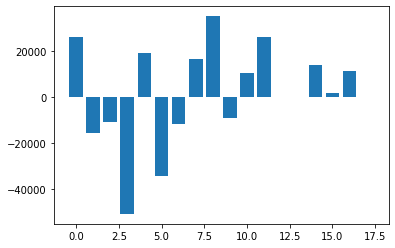

Feature: 17, Score: -48.40967


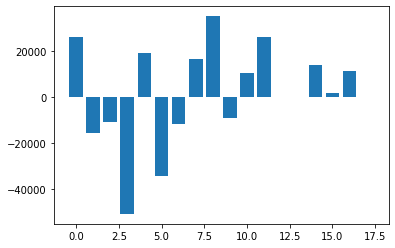

In [54]:
for i, v in enumerate(importancia):
  print('Feature: %0d, Score: %.5f' % (i,v))
  plt.bar([x for x in range(len(importancia))], importancia)
  plt.show()

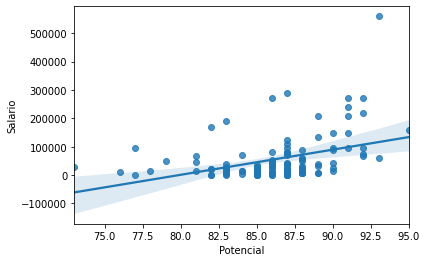

In [55]:
sns.regplot(x='Potencial', y='Salario', data=dados)

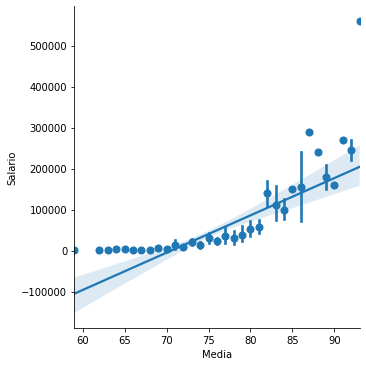

In [56]:
sns.lmplot(x='Media', y='Salario', data=dados, x_estimator=np.mean)

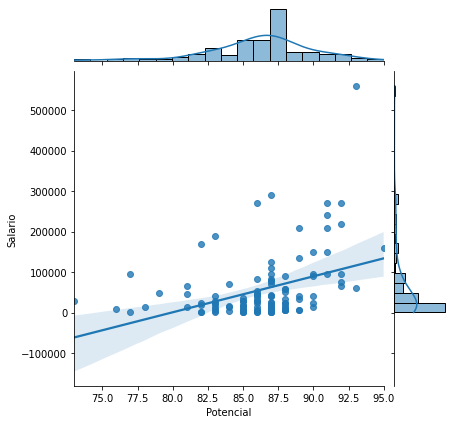

In [57]:
sns.jointplot(x='Potencial', y='Salario', data=dados, kind='reg')